In [21]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score , precision_score , recall_score , classification_report

In [3]:
train_dir=r'C:\Users\mohit\Downloads\dogs-vs-cats\dogs-vs-cats\train'
val_dir=r'C:\Users\mohit\Downloads\dogs-vs-cats\dogs-vs-cats\validation'
test_dir=r'C:\Users\mohit\Downloads\dogs-vs-cats\dogs-vs-cats\test'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  rescale=1.0/255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                         batch_size=100,
                                                         class_mode='binary', 
                                                         target_size=(150,150))


validation_datagen = ImageDataGenerator(
                                  rescale=1.0/255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                         batch_size=100,
                                                         class_mode='binary', 
                                                         target_size=(150,150))



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [14]:
print(f'Total Number of batches in training set : {len(train_generator)}')
print(f'Total Number of batches in validation set : {len(validation_generator)}')
print(f'Total Batch size : {len(train_generator.next()[0])}')
print(f'shape of the image : {train_generator.next()[0][0].shape}')
print(f'Minimum pixel value : {np.min(train_generator.next()[0])}')
print(f'Maximum pixel value : {np.max(train_generator.next()[0])}')

Total Number of batches in training set : 200
Total Number of batches in validation set : 50
Total Batch size : 100
shape of the image : (150, 150, 3)
Minimum pixel value : 0.0
Maximum pixel value : 1.0


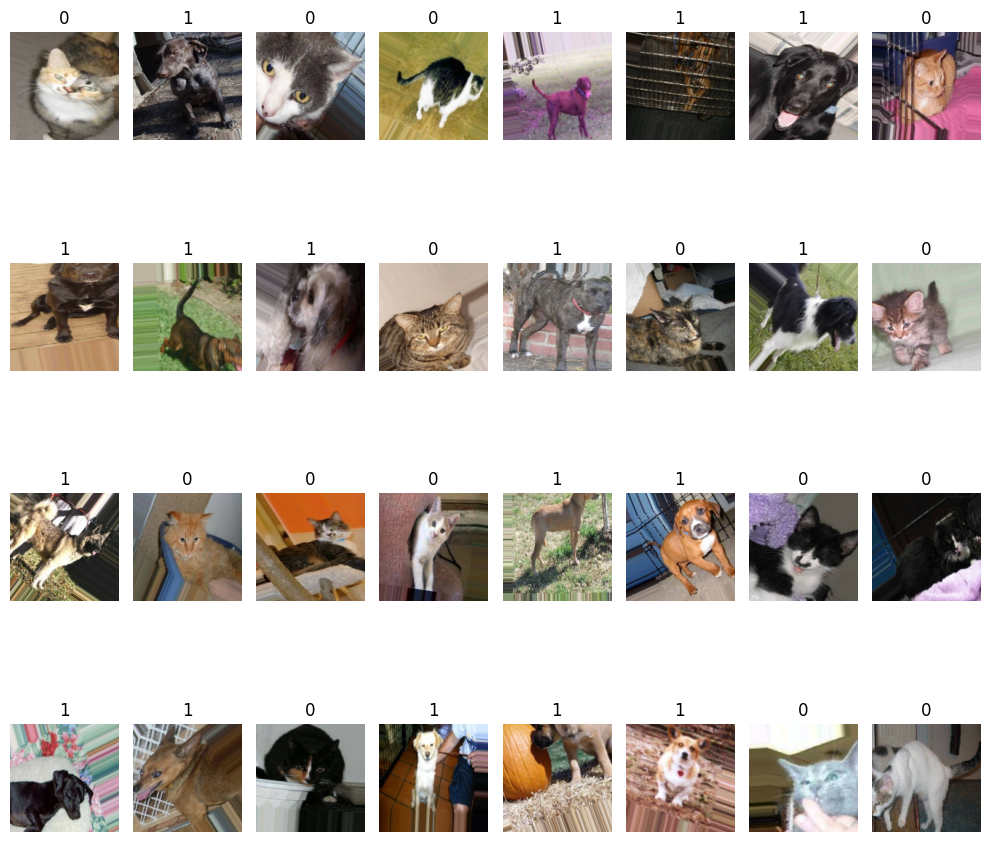

In [15]:
rows = 4
cols = 8

fig, ax = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows):
    for j in range(cols):
        r = random.randint(0, len(train_generator.next()[0]) - 1)
        images,labels=train_generator.next()
        ax[i, j].imshow(images[r])
        ax[i, j].set_title(int(labels[r]))
        ax[i, j].axis('off')

plt.tight_layout()
plt.show()


In [16]:
filepath = 'models/model_epoch_{epoch:02d}.h5'

checkpoint = ModelCheckpoint(filepath,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_best_only=True,
                                      mode='min',
                                      save_weights_only=False)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [18]:
history=model.fit(train_generator , epochs=20 , verbose=1 , validation_data=validation_generator , callbacks=[checkpoint])

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.6903 - acc: 0.5504
Epoch 1: val_loss improved from inf to 0.64343, saving model to models\model_epoch_01.h5
200/200 [==============================] - 254s 1s/step - loss: 0.6903 - acc: 0.5504 - val_loss: 0.6434 - val_acc: 0.6324
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.6436 - acc: 0.6265
Epoch 2: val_loss improved from 0.64343 to 0.61828, saving model to models\model_epoch_02.h5
200/200 [==============================] - 254s 1s/step - loss: 0.6436 - acc: 0.6265 - val_loss: 0.6183 - val_acc: 0.6514
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.6085 - acc: 0.6636
Epoch 3: val_loss did not improve from 0.61828
200/200 [==============================] - 245s 1s/step - loss: 0.6085 - acc: 0.6636 - val_loss: 0.6425 - val_acc: 0.6322
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.5866 - acc: 0.6864
Epoch 4: val_loss improved from 0.61828 t

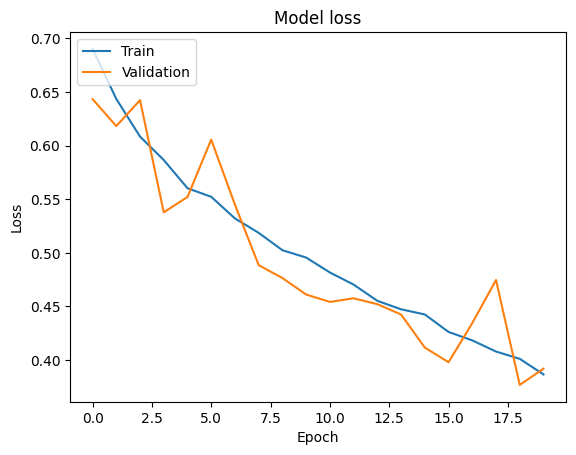

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
classifier=load_model('models/model_epoch_19.h5')
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150))

Found 614 images belonging to 2 classes.


In [28]:
arr=[]
y_test=[]
for i in range(len(test_generator)):
    img,labels=test_generator.next()
    arr.extend(img)
    y_test.extend(labels)
x_test=np.array(arr)

In [50]:
y_pred=classifier.predict(x_test)

20/20 [==============================] - 4s 173ms/step


In [53]:
y_pred_labels = (y_pred >= 0.5).astype(int)

In [63]:
y_predicted=list(y_pred_labels)
y_real=np.argmax(y_test,axis=1)

In [66]:
len(y_predicted)

614

In [75]:
print(f'The accuracy of the model predictions on test data: {accuracy_score(y_real, y_predicted):.2f}')
print('--------------------------------------------------------------------------------------------------')
print(f'The precision of the model predictions on test data: {precision_score(y_real, y_predicted):.2f}')
print('--------------------------------------------------------------------------------------------------')
print(f'The recall of the model predictions on test data: {recall_score(y_real, y_predicted):.2f}')
print('--------------------------------------------------------------------------------------------------')
print(f'The classification report of the model predictions on test data: {classification_report(y_real, y_predicted)}')

The accuracy of the model predictions on test data: 0.86
--------------------------------------------------------------------------------------------------
The precision of the model predictions on test data: 0.77
--------------------------------------------------------------------------------------------------
The recall of the model predictions on test data: 0.96
--------------------------------------------------------------------------------------------------
The classification report of the model predictions on test data:               precision    recall  f1-score   support

           0       0.96      0.80      0.87       362
           1       0.77      0.96      0.85       252

    accuracy                           0.86       614
   macro avg       0.87      0.88      0.86       614
weighted avg       0.88      0.86      0.87       614



1/1 [==============================] - 0s 31ms/step


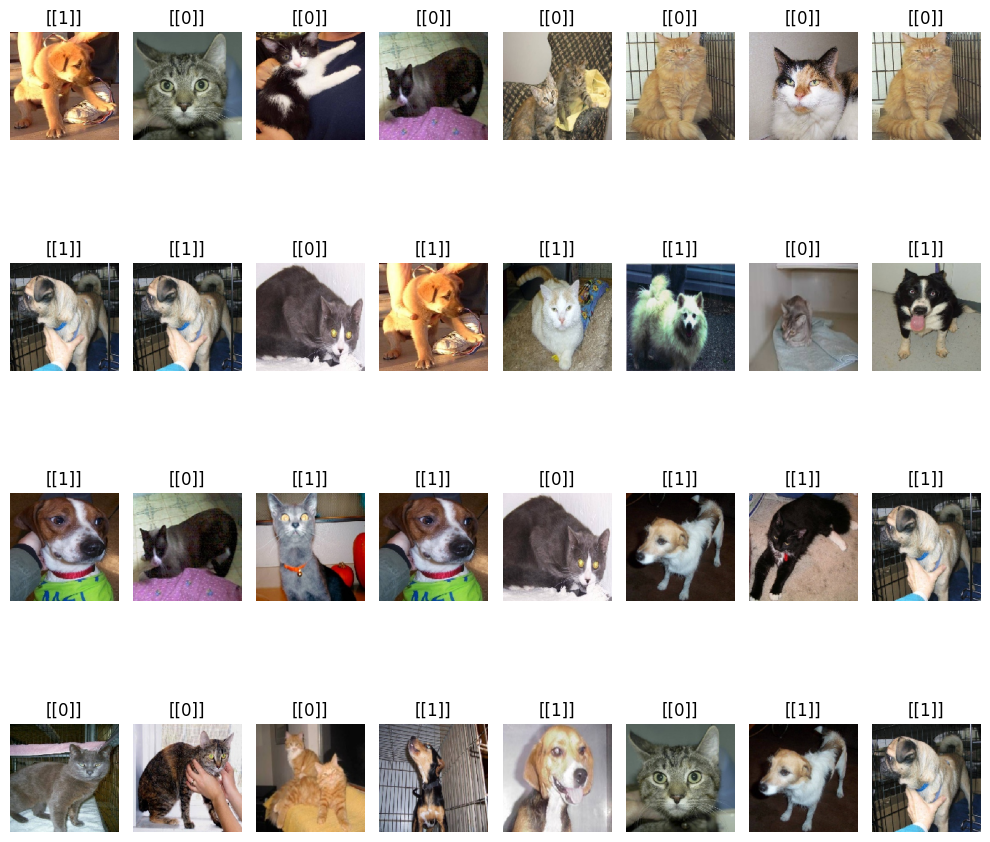

In [90]:
rows = 4
cols = 8
img= test_generator.next()[0]
fig, ax = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
    for j in range(cols):
        r = random.randint(0, len(test_generator.next()[0]) - 1)
        ax[i,j].imshow(img[r])
        pred=classifier.predict(np.expand_dims(img[r], axis=0))
        title=(pred>=0.5).astype(int)
        ax[i,j].set_title(title)
        ax[i,j].axis('off')
plt.tight_layout()
plt.show()